## How well do Jobs and Skills pay for Data Analysts in United States?

Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills


In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month_no'] = df['job_posted_date'].dt.month
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg']).copy()
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]


Text(0.5, 1.0, 'Salary Distribution in United States')

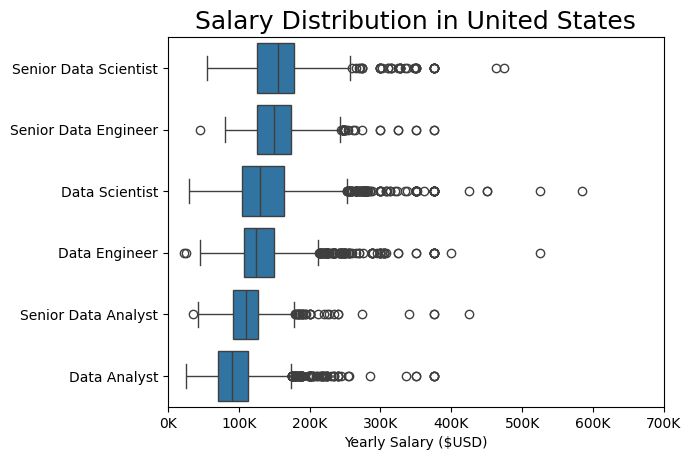

In [ ]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short', order=job_order)

ax = plt.gca()
ax.set_xlim(0,700_000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i : f'{int(x/1000)}K'))
ax.set_xlabel('Yearly Salary ($USD)')
ax.set_ylabel('')
ax.set_title('Salary Distribution in United States', fontsize= 18)